# Assignment 1.1: ML Tools, Process, and Your Learnings

## 1. Summarize the following:


* ### What is overfitting and underfitting? Provide examples.



Overfitting and underfitting are conditions in machine learning, and managing them is a core challenge in data science workflows especially in developing AI systems (Mucci, 2025). These two concepts stem from the balance between two key sources of error in machine learning models - bias and variance. Bias is the error that happens when a model lacks in learning details from the given data, while variance is the error that happens when a model learns too much details from the given data. 
<br>
<br>
Overfitting happens when a machine learning model learns too much from training data, including details that aren't really necessary like noise and/or outliers. In this case, the model tries to forcibly fit in to the point that it doesn't care about recognizing patterns (which is how the machine learns). It is caused either by having high variance and low bias in the training data, excessive complexity in the machine learning model, and size of the training data. In humans, overfitting is like memorizing what is taught, which results to students not being able to learn any concepts that they can apply for real-world scenarios. Similarly, overfitting results to machine learning models performing perfectly when given with the training data but falls flat when faced with real-world data.

On the other hand, underfitting happens when a machine learning model performs poorly on training data, which means that it probably didn't learn anything at all. In this case, the model oversimplifies everything to the point that it doesn't recognize a pattern to learn. It is caused either by a model that is "too basic", having low variance and high bias in the training data, excessive regularization to prevent overfitting, or small size of the training dataset. This is roughly comparable to going to school but not learning anything at all and consequently, not being able to apply any learnings either. 

Ideally, machine learning models should be perfectly balanced to be considered "good". This means that the training data has low variance, and low bias, and is sufficient in terms of size. Below is a visual representation of what underfitting, goodfitting/balanced, and overfitting.

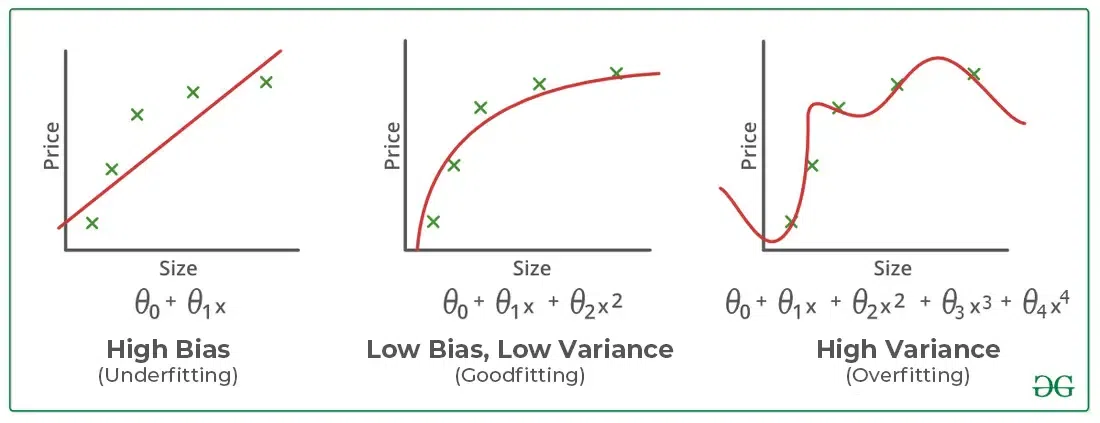
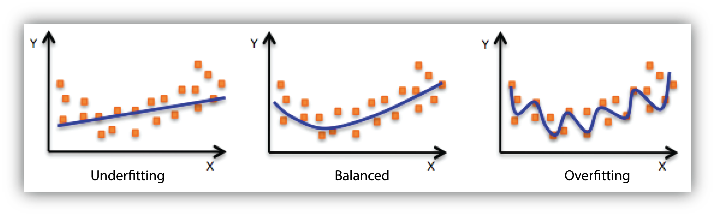

* ### Define cross fold validation. How is it useful?

Cross-validation is used in machine learning as a statistical method to estimate the skill of machine learning models. <br><br>
Cross fold validation or K-fold cross-validation partitions the dataset into multiple subsets of data to iteratively train and test the model. <br>
For instance, in 5-fold cross-validation, the dataset is split into five parts, with each part being a test set in one of five iterations to make sure that each segment is used for both training and testing.<br>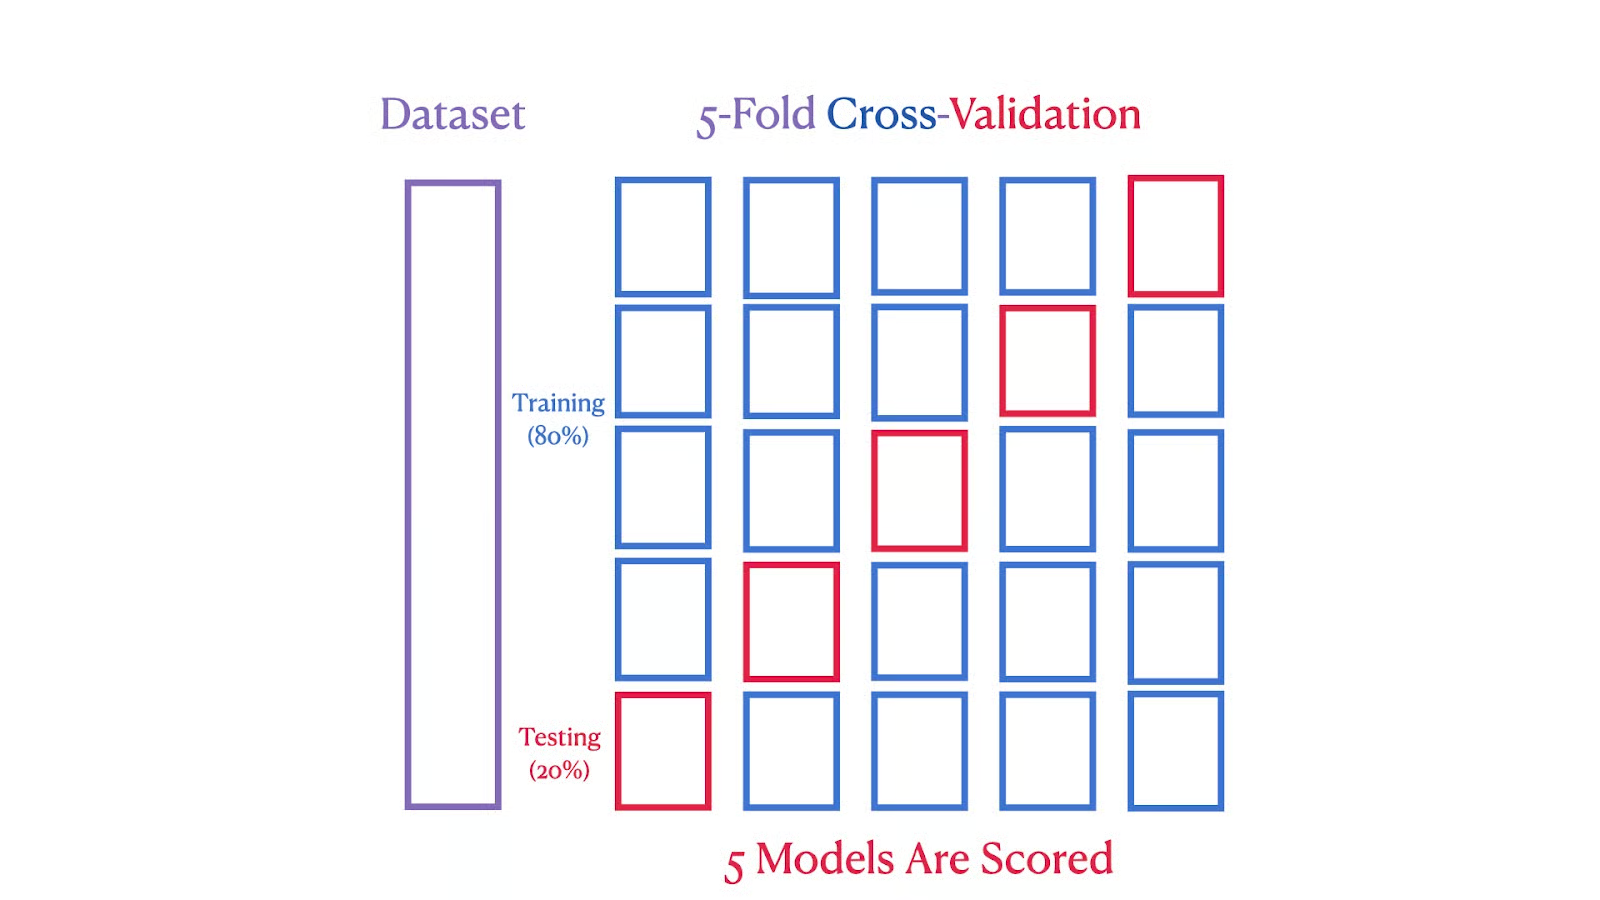<br>
This method is useful to reduce overfitting risk by detecting if a model is too tailored for a particular training set, and maximizes data usage as it uses all partitions of the dataset to train and test data.

## 2. Demonstrate data splitting for training and testing data. Using any preprocessing library in Python on the iris dataset provided in the module.

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
iris = pd.read_csv('Iris_Data (2).csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
# Separate features (X) and target (y)
X = iris.drop('species', axis=1)
y = iris['species']

# Split into training (75%) and testing (25%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25,       # 25% for testing
    random_state=42,     # for reproducibility
    stratify=y           # preserve class distribution
)

# Optional preprocessing: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Show results
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nFirst 10 rows of scaled training data:\n", X_train_scaled[:10])

Training set shape: (112, 4)
Testing set shape: (38, 4)

First 10 rows of scaled training data:
 [[ 1.79213839 -0.59619012  1.31568284  0.92066139]
 [ 2.14531053 -0.59619012  1.65378566  1.05085593]
 [-0.4446185  -1.50777093 -0.03672843 -0.25108947]
 [ 0.26172578 -0.59619012  0.13232298  0.13949415]
 [-0.4446185  -1.27987572  0.13232298  0.13949415]
 [ 0.49717388  0.54328588  1.25933237  1.70182864]
 [-1.50413492  0.77118108 -1.33278924 -1.16245125]
 [ 0.49717388 -0.82408532  0.63947721  0.79046685]
 [-1.26868682  0.08749548 -1.2200883  -1.29264579]
 [ 0.37944983 -0.59619012  0.58312674  0.79046685]]


After splitting the data, standardization was done to make sure that all the features are on a similar scale. This normalizes the values of each feature(column) so that mean = 0 and standard deviation = 1. The data was then fitted and transformed accordingly, hence the changes in the scaled training data (the output).

## 3. Provide a sample confusion matrix and demonstrate the computation of TP, FP, FN, TN. How can we derive accuracy of the model based on the previously mentioned metrics?

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Example true labels and predicted labels
y_true = [1, 0, 1, 1, 0, 0, 1, 0, 1, 0]
y_pred = [1, 0, 1, 0, 0, 0, 1, 0, 1, 0]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:\n", cm)
print(f"TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}")

# Compute accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)


Confusion Matrix:
 [[5 0]
 [1 4]]
TP: 4, FP: 0, FN: 1, TN: 5
Accuracy: 0.9


Accuracy of the model cna be computed by the formula: <br>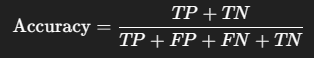 <br><br>
It's basically the number of times the model predicted it correctly divided by the total number of observations. <br>
In this case, the model predicted correctly 9 times out of 10 observations (5 True Positive + 4 True Negative), so it gets an accuracy of 0.9 or 90%.

## References

Mucci, T. (2025, April 16). Overfitting vs. Underfitting. IBM. Retrieved August 9, 2025, from https://www.ibm.com/think/topics/overfitting-vs-underfitting

GeeksforGeeks. (2025, January 27). ML | Underfitting and overfitting. GeeksforGeeks. https://www.geeksforgeeks.org/machine-learning/underfitting-and-overfitting-in-machine-learning/

Model Fit: Underfitting vs. Overfitting - Amazon Machine Learning. (n.d.). https://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html

Ryanholbrook. (2023, April 20). Overfitting and underfitting. Kaggle. https://www.kaggle.com/code/ryanholbrook/overfitting-and-underfitting

Mistry, R. (2025, March 11). 📊 Detecting Overfitting and Underfitting in Machine Learning Models. Medium. https://medium.com/@rohanmistry231/detecting-overfitting-and-underfitting-in-machine-learning-models-16da3829a22f

https://machinelearningmastery.com/k-fold-cross-validation/

https://www.datacamp.com/tutorial/k-fold-cross-validation